In [1]:
import pandas as pd
data = pd.read_csv('/content/india_earthquakes.csv')

In [2]:
data.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-12-29T16:31:16.478Z,25.0911,96.5235,10.000,5.0,mb,70.0,66.0,4.140,0.80,...,2024-03-02T21:39:33.040Z,"93 km WSW of Myitkyina, Myanmar",earthquake,3.61,1.862,0.051,121.0,reviewed,us,us
1,2023-12-25T23:53:27.068Z,23.1390,94.5220,114.245,4.1,mb,12.0,154.0,1.959,0.31,...,2024-03-02T21:39:35.040Z,"57 km SSE of Mawlaik, Myanmar",earthquake,18.63,12.400,0.198,7.0,reviewed,us,us
2,2023-12-25T23:03:56.507Z,34.7111,76.7782,34.705,4.6,mb,100.0,79.0,3.096,0.40,...,2024-03-02T21:39:40.040Z,"24 km S of Thang, India",earthquake,5.88,5.172,0.059,85.0,reviewed,us,us
3,2023-12-19T12:14:23.981Z,18.1110,95.9762,10.000,4.5,mb,49.0,154.0,2.840,0.83,...,2024-02-27T22:57:01.040Z,"43 km NNE of Letpandan, Myanmar",earthquake,7.47,1.904,0.100,29.0,reviewed,us,us
4,2023-12-18T23:43:13.481Z,22.8195,94.5073,87.022,4.1,mb,23.0,115.0,2.648,0.69,...,2024-02-27T22:56:56.040Z,"85 km E of Falam, Myanmar",earthquake,8.22,9.853,0.186,8.0,reviewed,us,us


In [ ]:
!pip install --upgrade scikit-learn xgboost lightgbm numpy pandas matplotlib seaborn scipy statsmodels


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 66.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 67.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 77.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 15.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
  Attempting uninstall: pandas
    Found existing installation: pan

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

data = pd.read_csv('india_earthquakes.csv')

X = data[['latitude', 'longitude', 'depth', 'nst', 'gap', 'dmin', 'rms']]
y = data['mag']

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Random Forest - MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R-squared: {r2}")


Random Forest - MAE: 0.2168163853727145, MSE: 0.08704434203234877, RMSE: 0.2950327812842986, R-squared: 0.5329488716134309


 Linear Regression Implementation

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

data = pd.read_csv('india_earthquakes.csv')

X = data[['latitude', 'longitude', 'depth', 'nst', 'gap', 'dmin', 'rms']]
y = data['mag']

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression - MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R-squared: {r2}")


Linear Regression - MAE: 0.25272322349668136, MSE: 0.1191845818725728, RMSE: 0.34523120060703205, R-squared: 0.36049498278498837


XGBoost (Gradient Boosting) Implementation

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

data = pd.read_csv('india_earthquakes.csv')

X = data[['latitude', 'longitude', 'depth', 'nst', 'gap', 'dmin', 'rms']]
y = data['mag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = xgb.XGBRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"XGBoost - MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R-squared: {r2}")


XGBoost - MAE: 0.21672067036943937, MSE: 0.08609541932374092, RMSE: 0.29342020946714104, R-squared: 0.5380404767822335


Support Vector Regression (SVR) Implementation

In [ ]:

from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

data = pd.read_csv('india_earthquakes.csv')

X = data[['latitude', 'longitude', 'depth', 'nst', 'gap', 'dmin', 'rms']]
y = data['mag']

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SVR(kernel='rbf')

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"SVR - MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R-squared: {r2}")


SVR - MAE: 0.22227283358105637, MSE: 0.09517184078172036, RMSE: 0.3084993367605842, R-squared: 0.48933940345932936


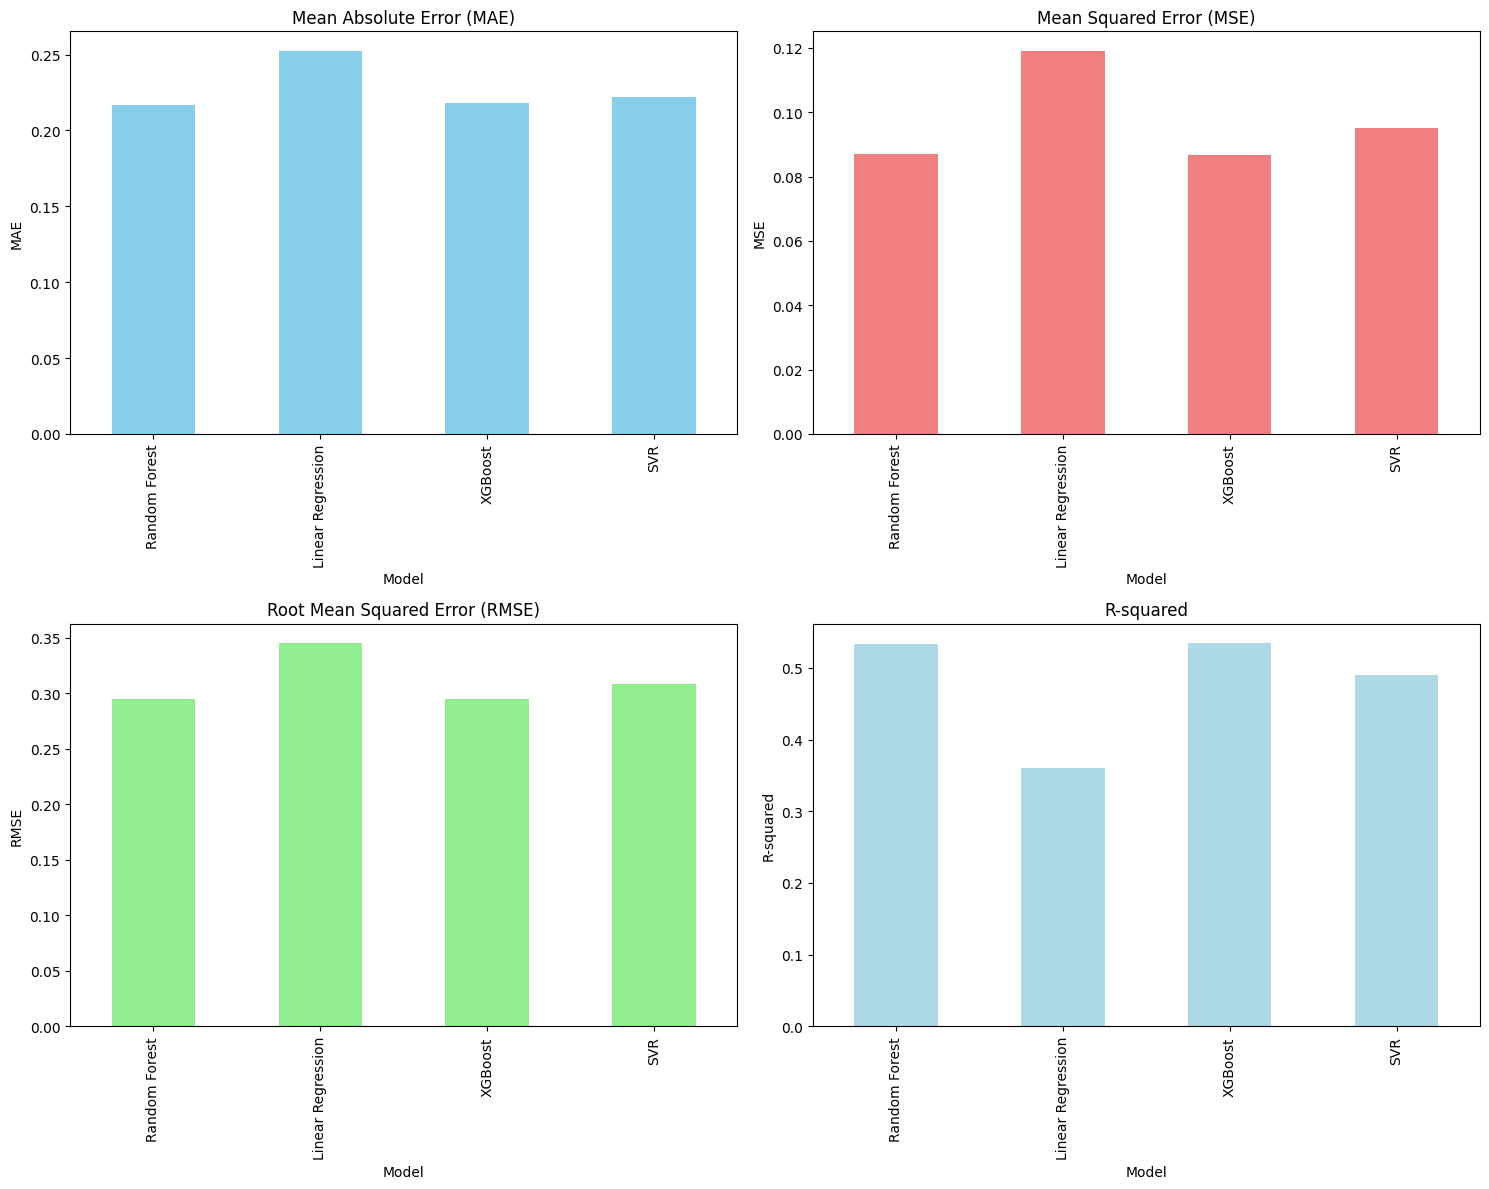

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('india_earthquakes.csv')

X = data[['latitude', 'longitude', 'depth', 'nst', 'gap', 'dmin', 'rms']]
y = data['mag']

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Linear Regression': LinearRegression(),
    'XGBoost': xgb.XGBRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(kernel='rbf')
}

metrics = {
    'Model': [],
    'MAE': [],
    'MSE': [],
    'RMSE': [],
    'R-squared': []
}

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

for model_name, model in models.items():
    if model_name == 'SVR':
        X_train_model, X_test_model = X_train_scaled, X_test_scaled
    else:
        X_train_model, X_test_model = X_train, X_test

    model.fit(X_train_model, y_train)

    y_pred = model.predict(X_test_model)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    r2 = r2_score(y_test, y_pred)

    metrics['Model'].append(model_name)
    metrics['MAE'].append(mae)
    metrics['MSE'].append(mse)
    metrics['RMSE'].append(rmse)
    metrics['R-squared'].append(r2)

metrics_df = pd.DataFrame(metrics)

fig, ax = plt.subplots(2, 2, figsize=(15, 12))

metrics_df.plot(kind='bar', x='Model', y='MAE', ax=ax[0, 0], color='skyblue', legend=False)
ax[0, 0].set_title('Mean Absolute Error (MAE)')
ax[0, 0].set_ylabel('MAE')

metrics_df.plot(kind='bar', x='Model', y='MSE', ax=ax[0, 1], color='lightcoral', legend=False)
ax[0, 1].set_title('Mean Squared Error (MSE)')
ax[0, 1].set_ylabel('MSE')

metrics_df.plot(kind='bar', x='Model', y='RMSE', ax=ax[1, 0], color='lightgreen', legend=False)
ax[1, 0].set_title('Root Mean Squared Error (RMSE)')
ax[1, 0].set_ylabel('RMSE')

metrics_df.plot(kind='bar', x='Model', y='R-squared', ax=ax[1, 1], color='lightblue', legend=False)
ax[1, 1].set_title('R-squared')
ax[1, 1].set_ylabel('R-squared')

plt.tight_layout()
plt.show()


In [ ]:
# prompt: take sample input predict magnitude

#@title Input Earthquake Data
latitude = 19.0911 #@param {type:"number"}
longitude = 72.5235 #@param {type:"number"}
depth = 10 #@param {type:"number"}
nst = 70 #@param {type:"number"}
gap = 65 #@param {type:"number"}
dmin = 4.14 #@param {type:"number"}
rms = 0.8 #@param {type:"number"}


new_data = [[latitude, longitude, depth, nst, gap, dmin, rms]]
new_data_transformed = imputer.transform(new_data)
predicted_magnitude = model.predict(new_data_transformed)
print(f"Predicted Earthquake Magnitu1de (Random Forest): {predicted_magnitude[0]}")

Predicted Earthquake Magnitu1de (Random Forest): 4.721412991652754


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [ ]:
import numpy as np
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import GridSearchCV

data = pd.read_csv('/content/india_earthquakes.csv')

X = data[['latitude', 'longitude', 'depth', 'nst', 'gap', 'dmin', 'rms']]
y = data['mag']
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

model1 = RandomForestRegressor(random_state=42)
model2 = xgb.XGBRegressor(random_state=42)

ensemble_model = VotingRegressor([('rf', model1), ('xgb', model2)])

param_grid = {
    'rf__n_estimators': [50, 100, 150],
    'rf__max_depth': [None, 10, 20],
    'xgb__n_estimators': [50, 100, 150],
    'xgb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.1, 0.01, 0.001]
}

grid_search = GridSearchCV(estimator=ensemble_model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_ensemble_model = grid_search.best_estimator_

y_pred = best_ensemble_model.predict(X_test)


In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Ensemble - MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R-squared: {r2}")

new_data = [[25.0911, 96.5235, 10, 70, 66, 4.14, 0.8]]
predicted_magnitude = best_ensemble_model.predict(new_data)
print(f"Predicted Earthquake Magnitude (Ensemble): {predicted_magnitude[0]}")


TypeError: got an unexpected keyword argument 'squared'

In [ ]:
data['latitude_longitude_interaction'] = data['latitude'] * data['longitude']
X = data[['latitude', 'longitude', 'depth', 'nst', 'gap', 'dmin', 'rms', 'latitude_longitude_interaction']]
y = data['mag']

from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.05, 0.01],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}
xgb_model = xgb.XGBRegressor(random_state=42)
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_xgb_model = grid_search.best_estimator_


from sklearn.ensemble import StackingRegressor

estimators = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('xgb', xgb.XGBRegressor(n_estimators=100, random_state=42)),
    ('svr', SVR(kernel='rbf'))
]

stacking_model = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
stacking_model.fit(X_train, y_train)


In [ ]:
y_pred = stacking_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Stacking - MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R-squared: {r2}")

threshold = 0.1
y_pred_class = [1 if abs(y_pred_i - y_test_i) <= threshold else 0 for y_pred_i, y_test_i in zip(y_pred, y_test)]
accuracy = sum(y_pred_class) / len(y_pred_class)
print(f"Stacking - Accuracy: {accuracy}")


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

df = pd.read_csv('/content/india_earthquakes.csv')

df = df.dropna()

df['time'] = pd.to_datetime(df['time'])
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day
df['hour'] = df['time'].dt.hour
df['minute'] = df['time'].dt.minute
df['second'] = df['time'].dt.second

X = df[['latitude', 'longitude', 'depth', 'nst', 'gap', 'dmin', 'rms', 'horizontalError',
        'depthError', 'magError', 'year', 'month', 'day', 'hour', 'minute', 'second']]

y = df['mag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                   n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

random_search.fit(X_train, y_train)


best_model = random_search.best_estimator_


y_pred = best_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Hyperparameters: {random_search.best_params_}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('/content/india_earthquakes.csv')

df = df[['latitude', 'longitude', 'depth', 'nst', 'gap', 'dmin', 'rms', 'magNst', 'mag']].dropna()

X = df[['latitude', 'longitude', 'depth', 'nst', 'gap', 'dmin', 'rms', 'magNst']]
y = df['mag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                   n_iter=20, cv=3, verbose=1, random_state=42, n_jobs=-1)


random_search.fit(X_train, y_train)

best_model = random_search.best_estimator_

y_pred = best_model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Hyperparameters: {random_search.best_params_}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.title('Actual vs Predicted Earthquake Magnitude')
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(6, 4))
plt.bar(['R-squared'], [r2])
plt.ylabel('Accuracy')
plt.title('Model Accuracy (R-squared)')
plt.show()

In [ ]:
#@title Input Earthquake Data
latitude = 19.0911 #@param {type:"number"}
longitude = 72.5235 #@param {type:"number"}
depth = 10 #@param {type:"number"}
nst = 70 #@param {type:"number"}
gap = 65 #@param {type:"number"}
dmin = 4.14 #@param {type:"number"}
rms = 0.8 #@param {type:"number"}
magNst = 5.2 #@param {type:"number"}

new_data = [[latitude, longitude, depth, nst, gap, dmin, rms, magNst]]
predicted_magnitude = best_model.predict(new_data)
print(f"Predicted Earthquake Magnitude (Random Forest): {predicted_magnitude[0]}")

In [ ]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

data = pd.read_csv('india_earthquakes.csv')

X = data[['latitude', 'longitude', 'depth', 'nst', 'gap', 'dmin', 'rms']]
y = data['mag']

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Decision Tree - MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R-squared: {r2}")

data = pd.read_csv('india_earthquakes.csv')

X = data[['latitude', 'longitude', 'depth', 'nst', 'gap', 'dmin', 'rms']]
y = data['mag']

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"K-Nearest Neighbors - MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R-squared: {r2}")

data = pd.read_csv('india_earthquakes.csv')

X = data[['latitude', 'longitude', 'depth', 'nst', 'gap', 'dmin', 'rms']]
y = data['mag']

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MLP Regressor - MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R-squared: {r2}")
